In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Read and Information

In [260]:
#read csv file using pandas and data information
loan = pd.read_csv("loan.csv", sep="," , low_memory=False)
loan.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

# Data Understanding

In [8]:
#using head funtion give first 5 row

In [261]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [262]:
# name of all column
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

In [263]:
# percentage of missing values in each column
loan.isnull().sum()/len(loan.index)*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

Some columns have a large number of 100% ,65%,33% etc missing values, let's first fix the missing values and then check for other types of data quality problems.

In [264]:
#removed the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


Now we have 55 columns which have less 90% missing value

# Data Analysis

Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

Thus, going forward, we will use only the other two types of variables.

In [265]:
#all the columns which are belong to behavious variable 
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [266]:
# drop the all columns belong behavious
# let's now remove the behaviour variables from analysis
df = loan.drop(behaviour_var, axis=1)
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [267]:
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
# thus let get rid of all these variables as well

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [269]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [270]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

loan_status
0    32950
1     5627
Name: count, dtype: int64

In [218]:
#return the datatype of all columns
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                     int64
pymnt_plan                     object
desc                           object
purpose                        object
dti                           float64
mths_since_last_delinq        float64
initial_list_status            object
collections_12_mths_ex_med    float64
policy_code                     int64
acc_now_delinq                  int64
chargeoff_wi

Data type of loan status is int so we convert it into category

In [271]:
#change the datatype of loan_status to integers
df['loan_status'] = df['loan_status'].astype('int64')

In [272]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                     int64
pymnt_plan                     object
desc                           object
purpose                        object
dti                           float64
mths_since_last_delinq        float64
initial_list_status            object
collections_12_mths_ex_med    float64
policy_code                     int64
acc_now_delinq                  int64
chargeoff_wi

In [273]:
#count the total value of loan status
df['loan_status'].value_counts()

loan_status
0    32950
1     5627
Name: count, dtype: int64

In [274]:
# The column int_rate is character type, let's convert it to float
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [275]:
df = df.drop(['id','member_id','collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','policy_code'],axis=1)

In [276]:
data=df

In [277]:
df.dtypes

loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                 int64
pymnt_plan                 object
desc                       object
purpose                    object
dti                       float64
mths_since_last_delinq    float64
initial_list_status        object
pub_rec_bankruptcies      float64
dtype: object

# Univariate Analysis.

In [279]:
# default rate
round(np.mean(df['loan_status']), 2)

0.15

The overall default rate is about 15%.
Let's first visualise the average default rates across categorical variables.

In [280]:
#ignore the all the warning regarding plot the graphs
import warnings
warnings.filterwarnings('ignore')

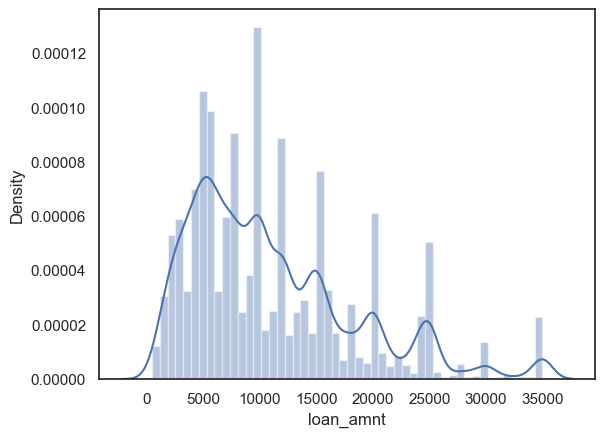

In [281]:
# plotting density and loan amount
sns.distplot(df['loan_amnt'])
plt.show()

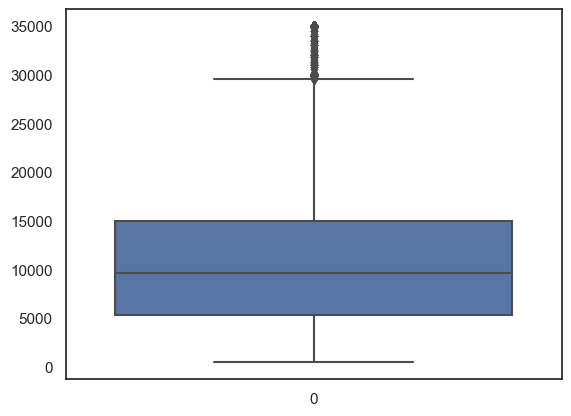

In [282]:
#boxplot of loan_amount
sns.boxplot(df['loan_amnt'])
plt.show()

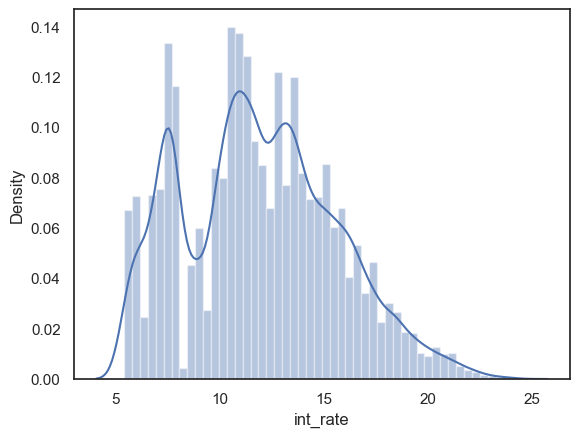

In [283]:
#distplot of interest rate
sns.distplot(df['int_rate'])
plt.show()

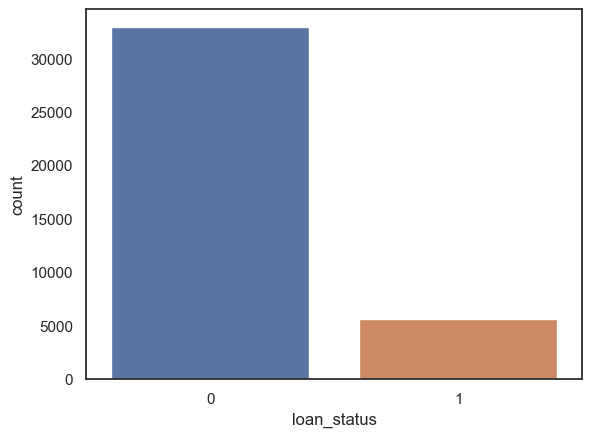

In [284]:
#boxplot of loan_status
sns.countplot(data=df,x="loan_status")
plt.show()

In [285]:
df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [286]:
#change the string datatype to category
df["grade"] = df["grade"].astype("category")

In [287]:
df["grade"].dtypes

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False)

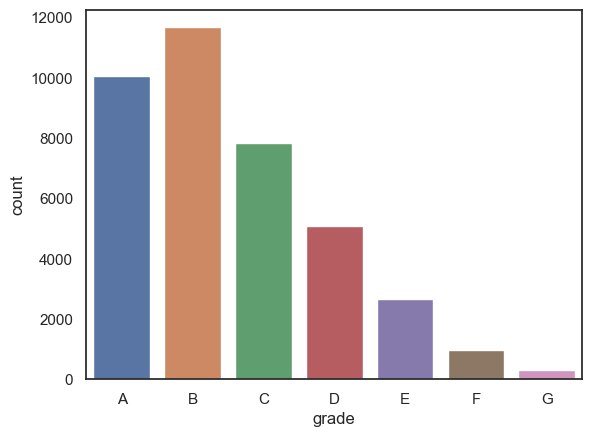

In [288]:
#count plot of grades
sns.countplot(data=df,x="grade")
plt.show()

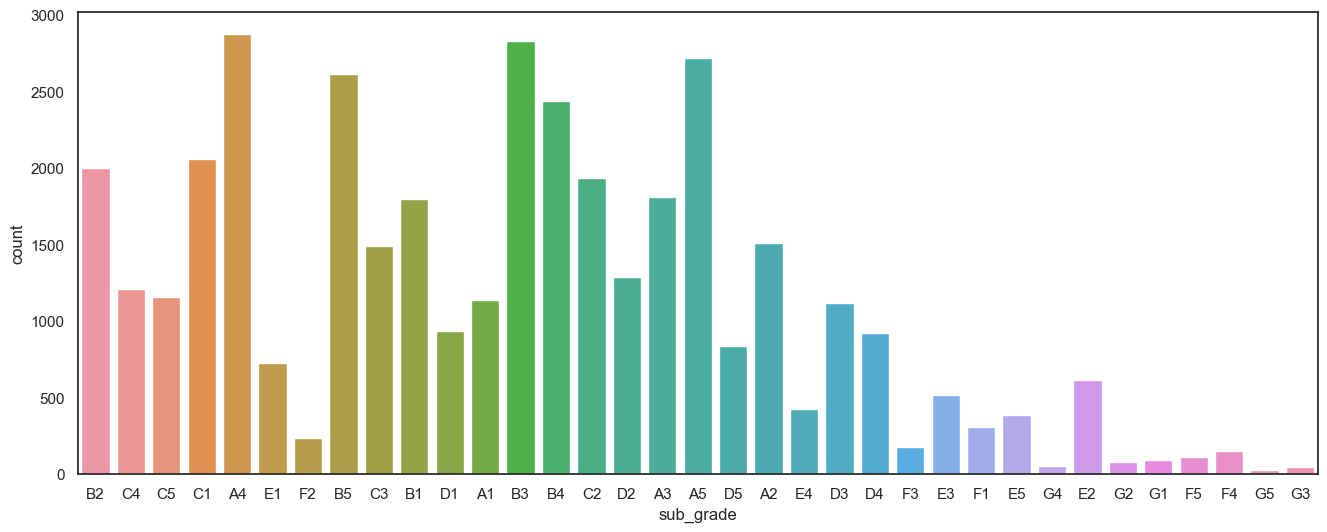

In [289]:
#count plot of Sub grades
plt.figure(figsize=(16, 6))
sns.countplot(data=df,x="sub_grade")
plt.show()

# Bivariate Analysis.

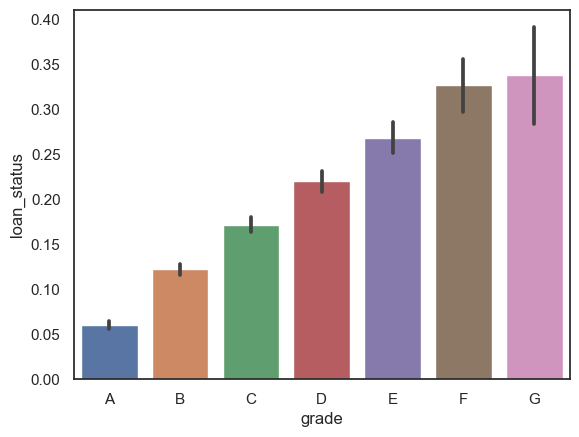

In [290]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

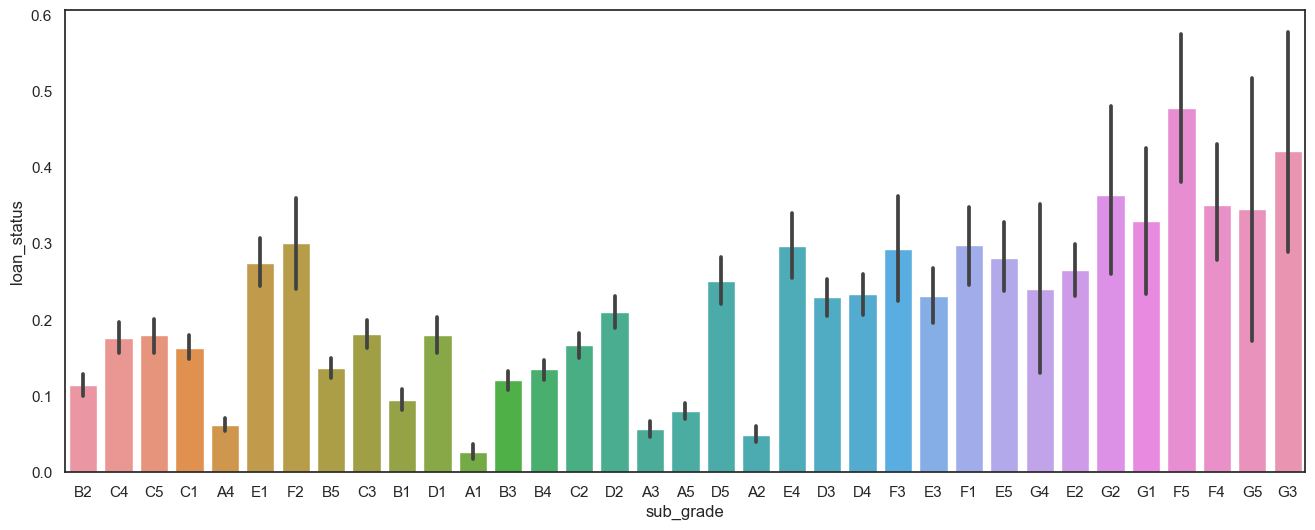

In [291]:
# plotting default rates across sub_grade of the loan
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_status', data=df)
plt.show()

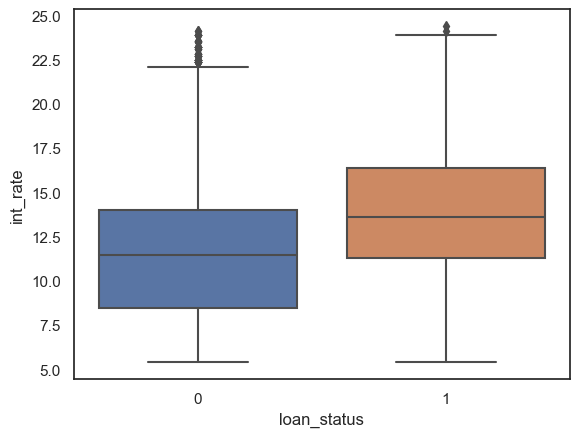

In [293]:
# ploting boxplot between interest rate and loan status
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=df)
plt.show()

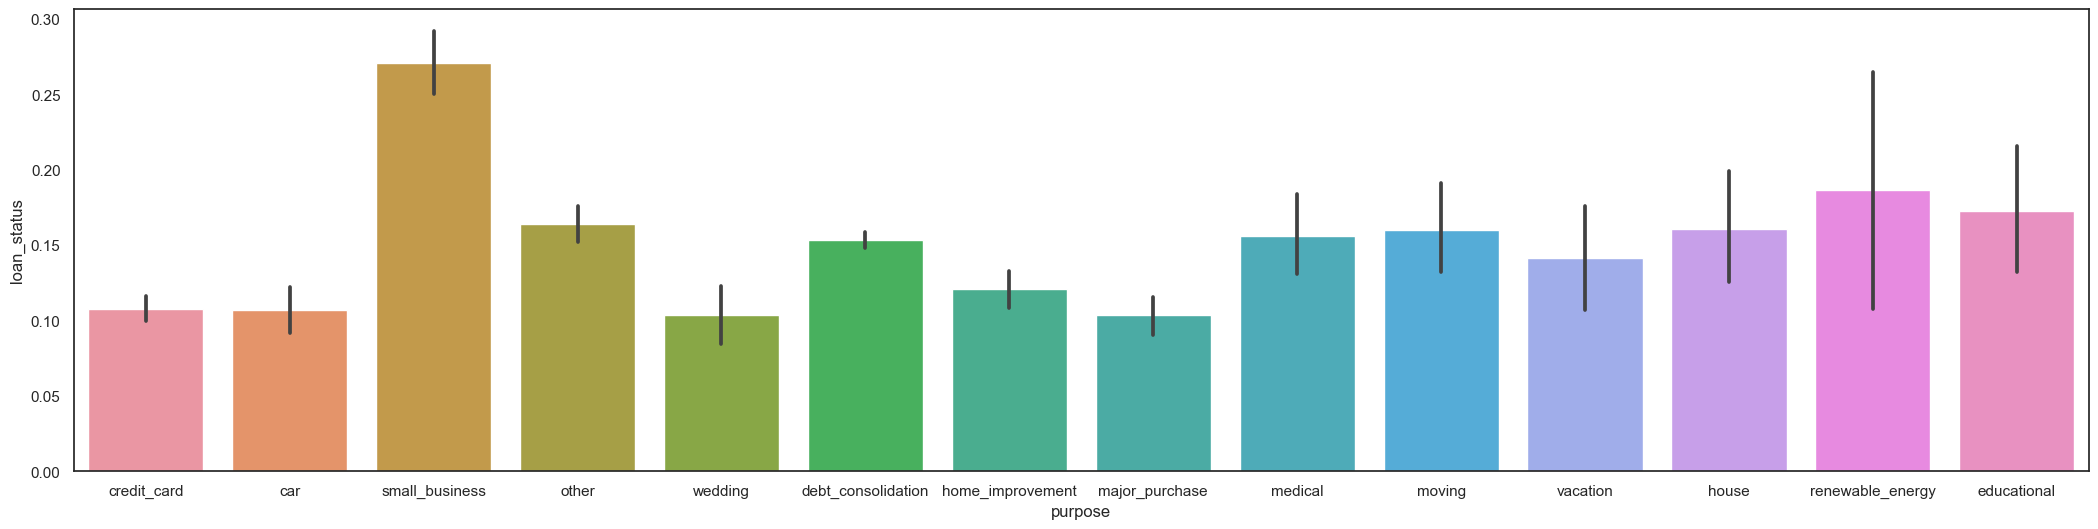

In [294]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(26, 6))
sns.barplot(x='purpose', y='loan_status', data=df)
plt.show()

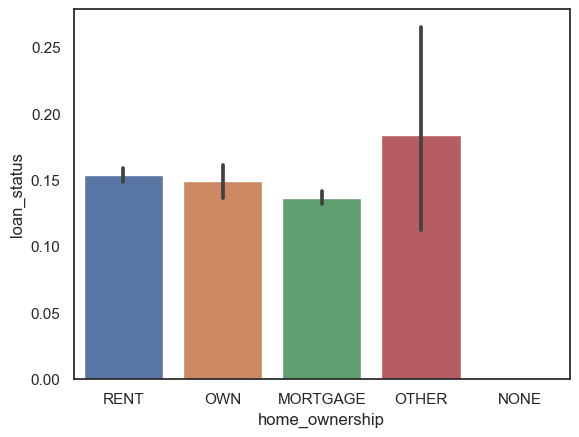

In [295]:
# home ownership: not a great discriminator
sns.barplot(x='home_ownership', y='loan_status', data=df)
plt.show()

In [296]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

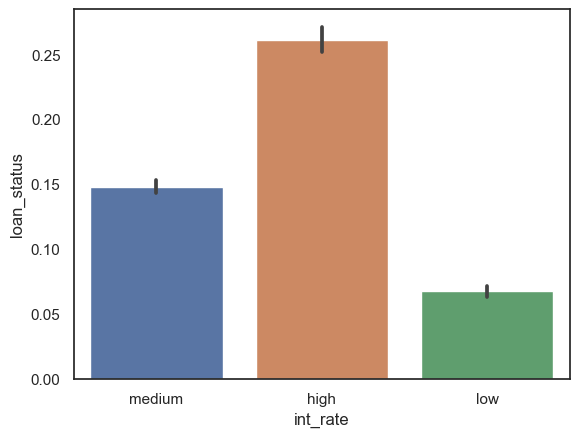

In [297]:
# ploting barplot between interest rate and loan status
sns.barplot(x='int_rate', y='loan_status', data=df)
plt.show()

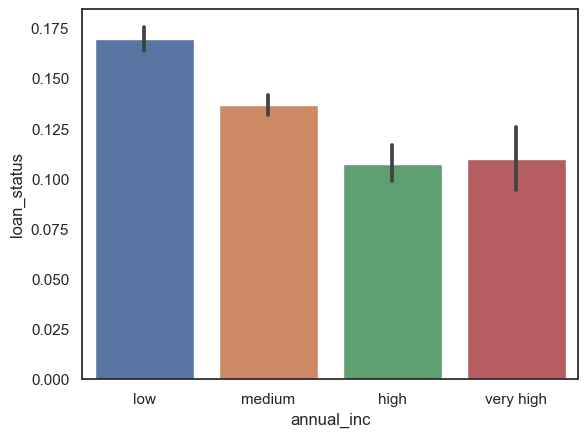

In [298]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))
sns.barplot(x='annual_inc', y='loan_status', data=df)
plt.show()

# Segmented Univariate Analysis

In [299]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()
   

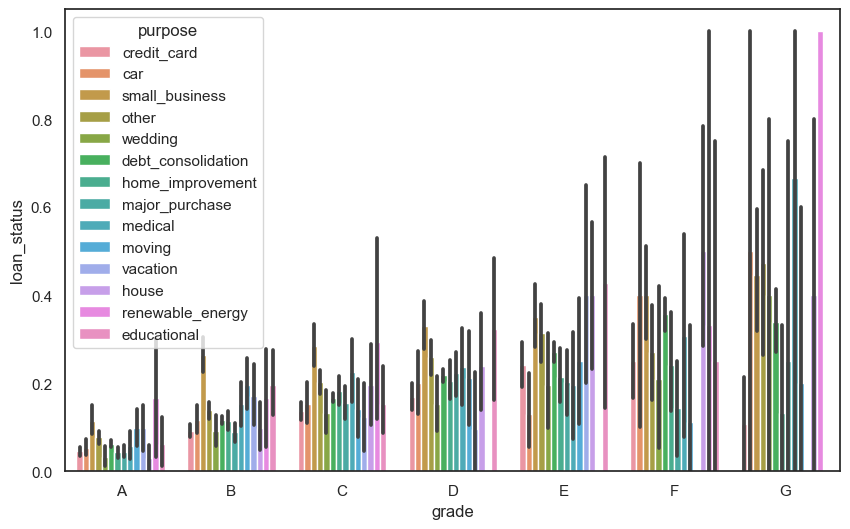

In [300]:
plot_segmented('grade')

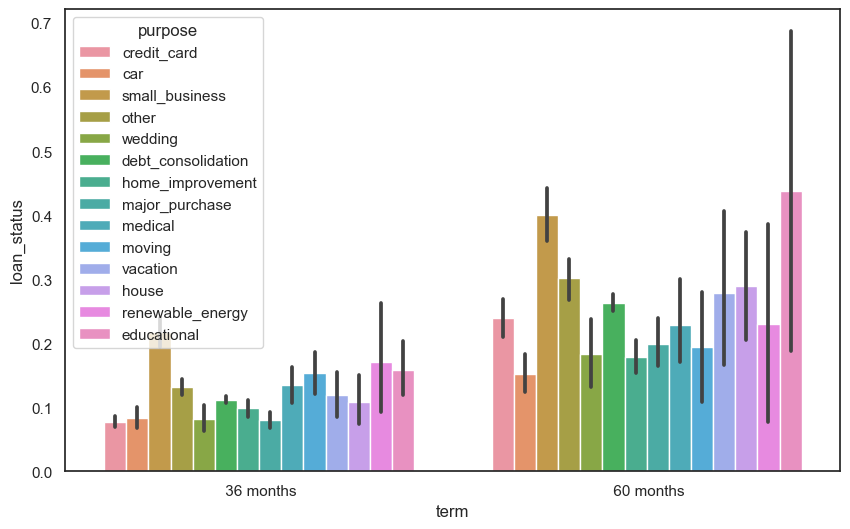

In [301]:
plot_segmented('term')

In [302]:
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: count, dtype: int64

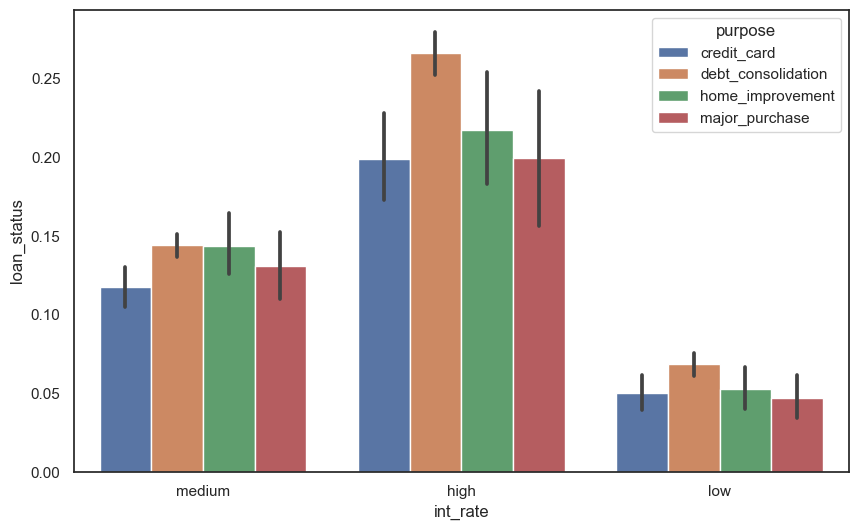

In [303]:
plot_segmented('int_rate')

In [304]:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

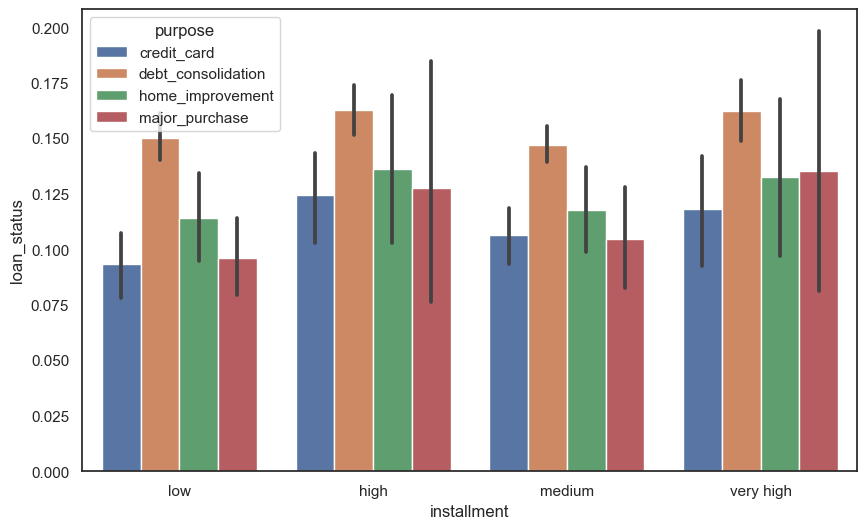

In [305]:
plot_segmented('installment')

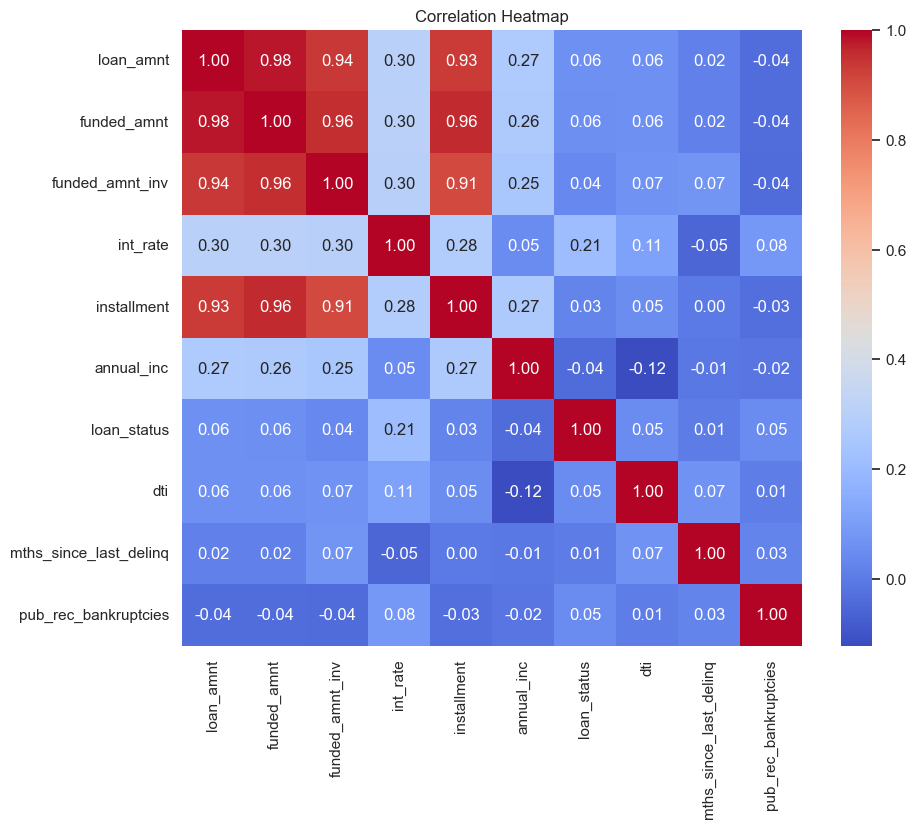

In [278]:
numeric_columns = df.select_dtypes(include=[np.number])  # Select numeric columns
correlation_matrix = numeric_columns.corr()  # Calculate the correlation matrix
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Conclusion

1. Univariate analysis show that Loan status of fully paid is greater than charged off.
2. Univariate analysis show that mostly loan amount is between 5k to 20k.
3. Univariate analysis show that grades of A,B,C greater than other grades.
4. Bivariate analysis show that as grades moves from A to G than loan status also moves linearly fully paid to charged off.
5. Bivariate analysis show that as interest rate increase than chance of charged off loan status also increase.
6. Bivariate analysis show that if purpose of loan is small business than the chance of charged off loan status are more than other purpose.
7. Bivariate analysis show that if annual incomes is low than chance of charged off loan status also increase.
8. Segmented Univariate Analysis show that if team is increase low than chance of charged off loan status also increase.
9. Segmented Univariate Analysis show that if interest rate is increase with purpose of debet consolidation than chance of charged off loan status also increase.
10. Heat map show that loan amount is directly depend on funded amount,funded amount investment and installments. and loan status depends on interest rate ,loan amount,funded amount,funded amount investment and installments.